<a href="https://colab.research.google.com/github/saktheeswaranswan/Automatic-differentiation-by-monk/blob/main/automatic_differentiation_by_monk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install sympy autograd numpy
!pip install sympy autograd numpy


In [2]:
import csv
import sympy as sp
import autograd.numpy as np
import autograd as ag

# Define the function f(x) = x^2 + 2x + 1
def f(x):
    return x**2 + 2*x + 1

# Define the symbolic differentiation
x_sym = sp.Symbol('x')
f_sym = x_sym**2 + 2*x_sym + 1
f_sym_derivative = sp.diff(f_sym, x_sym)

# Define the numerical differentiation using central difference method
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Define the automatic differentiation using Autograd
f_auto_derivative = ag.grad(f)

# Evaluate the derivatives at x=2
x_value = np.array([2.0])  # Convert the input to a NumPy array
numerical_result = numerical_derivative(f, x_value[0])
symbolic_result = f_sym_derivative.subs(x_sym, x_value[0])
automatic_result = f_auto_derivative(x_value)[0]  # Convert the result back to a scalar

# Create a list of dictionaries to represent the data
data = [
    {'Method': 'Numerical Differentiation', 'Result': numerical_result},
    {'Method': 'Symbolic Differentiation', 'Result': symbolic_result},
    {'Method': 'Automatic Differentiation', 'Result': automatic_result}
]

# Export data to CSV file
csv_filename = 'differentiation_results.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['Method', 'Result']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in data:
        writer.writerow(row)

print(f"Results exported to {csv_filename}.")


Results exported to differentiation_results.csv.


Results exported to differentiation_results.csv.


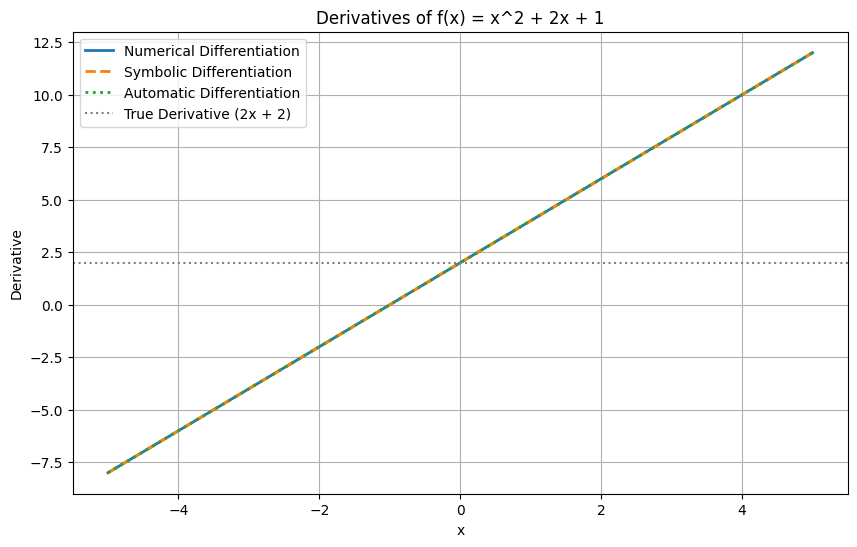

In [5]:
import csv
import sympy as sp
import autograd.numpy as np
import autograd as ag
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 + 2x + 1
def f(x):
    return x**2 + 2*x + 1

# Define the symbolic differentiation
x_sym = sp.Symbol('x')
f_sym = x_sym**2 + 2*x_sym + 1
f_sym_derivative = sp.diff(f_sym, x_sym)

# Define the numerical differentiation using central difference method
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Define the automatic differentiation using Autograd
f_auto_derivative = ag.elementwise_grad(f)

# Generate a range of x values
x_values = np.linspace(-5, 5, 100)

# Calculate derivatives for each x value using different methods
numerical_results = [numerical_derivative(f, x_val) for x_val in x_values]
symbolic_results = [f_sym_derivative.subs(x_sym, x_val) for x_val in x_values]
automatic_results = f_auto_derivative(x_values)

# Create a list of dictionaries to represent the data
data = [
    {'x': x_val, 'Numerical Differentiation': num_result, 'Symbolic Differentiation': sym_result, 'Automatic Differentiation': auto_result}
    for x_val, num_result, sym_result, auto_result in zip(x_values, numerical_results, symbolic_results, automatic_results)
]

# Export data to CSV file
csv_filename = 'differentiation_results.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['x', 'Numerical Differentiation', 'Symbolic Differentiation', 'Automatic Differentiation']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in data:
        writer.writerow(row)

print(f"Results exported to {csv_filename}.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, numerical_results, label='Numerical Differentiation', linestyle='-', linewidth=2)
plt.plot(x_values, symbolic_results, label='Symbolic Differentiation', linestyle='--', linewidth=2)
plt.plot(x_values, automatic_results, label='Automatic Differentiation', linestyle=':', linewidth=2)
plt.xlabel('x')
plt.ylabel('Derivative')
plt.title('Derivatives of f(x) = x^2 + 2x + 1')
plt.legend()
plt.grid(True)
plt.axhline(2, color='gray', linestyle='dotted', label='True Derivative (2x + 2)')
plt.legend()
plt.show()
